# Unsupervised Learning: Clustering

In classification (supervised), we try to find boundaries/rules to separate points according to pre-determined labels.

In clustering, the algorithm chooses the labels.  Goal is to choose labels so that similar rows get labeled the same.

Today: K-Means Clustering

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets

In [14]:
x, y = datasets.make_blobs(n_samples=100, centers=3, cluster_std=1.2, random_state=3)
df = pd.DataFrame(x, columns=["x0", "x1"])
df.head()

,x0,x1
0,8.370099,7.747045
1,-2.701740,0.395336
2,-3.204128,-0.407438
3,-3.132762,-1.335692
4,7.152737,6.069995


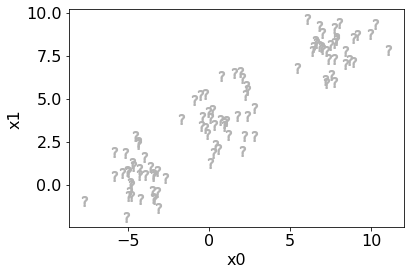

In [15]:
# x0 => x-axis
# x1 => y-axis
# cluster => marker type
def km_scatter(df, **kwargs):
    ax = kwargs.pop("ax", None)
    if not "label" in df.columns:
        return df.plot.scatter(x="x0", y="x1", marker="$?$", ax=ax, **kwargs)

    for marker in set(df["label"]):
        sub_df = df[df["label"] == marker]
        ax = sub_df.plot.scatter(x="x0", y="x1", marker=marker, ax=ax, **kwargs)
    return ax

ax = km_scatter(df, s=100, c="0.7")

# Hard Problem

Finding the best answer.

# Easier Problem

Taking a bad answer and make it a little better.  Then repeat!

<AxesSubplot:xlabel='x0', ylabel='x1'>

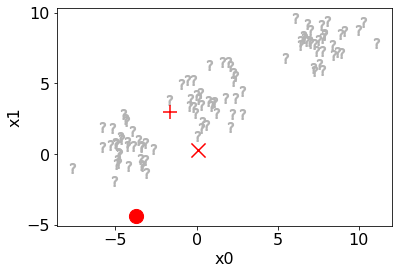

In [70]:
clusters = np.random.uniform(-5, 5, size=(3,2))
clusters = pd.DataFrame(clusters, columns=["x0", "x1"])
clusters["label"] = ["o", "+", "x"]

ax = km_scatter(df, s=100, c="0.7")
km_scatter(clusters, s=200, c="red", ax=ax)

In [66]:
clusters

,x0,x1,label
0,3.757285,1.077000,o
1,3.069638,-1.332552,+
2,-2.317625,4.505622,x


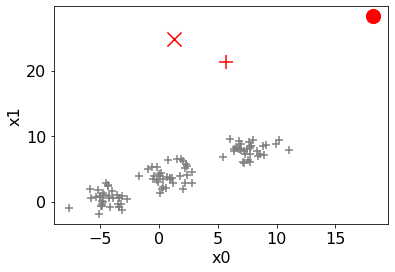

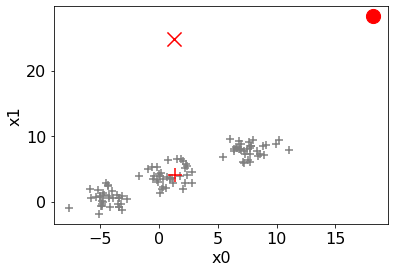

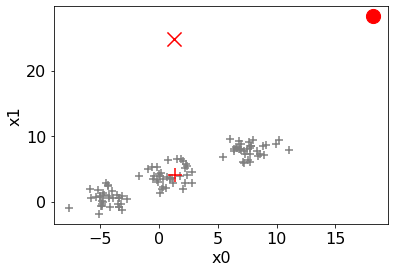

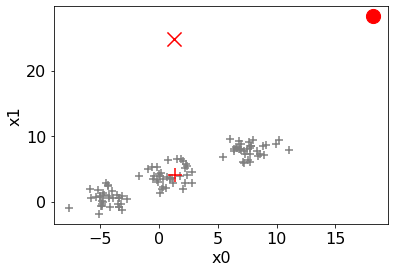

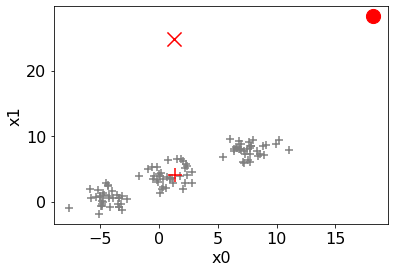

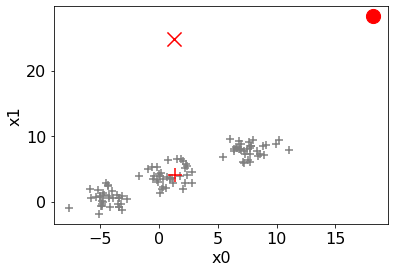

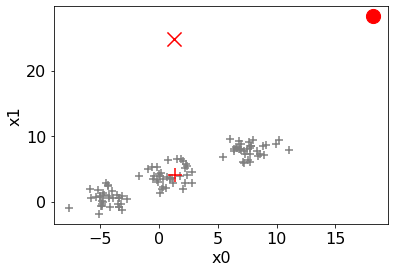

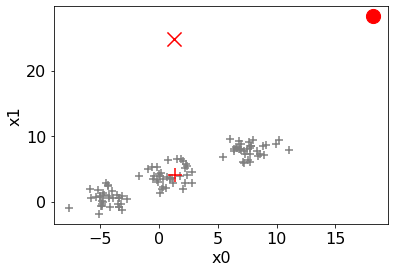

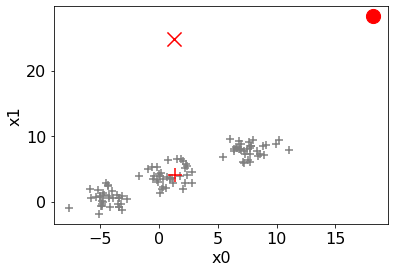

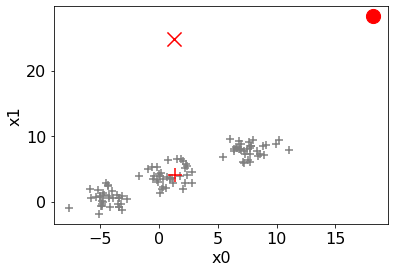

In [69]:
class KM:
    def __init__(self, df, clusters):
        self.df = df.copy()
        self.clusters = clusters.copy()
        self.labels = np.array(clusters["label"])
        
    def plot(self):
        ax = km_scatter(self.df, color="gray", s=50)
        km_scatter(self.clusters, color="red", ax=ax, s=200)
        
    # centroids(clusters) => points(df)
    def assign_points(self):
        for cluster in self.clusters.itertuples():         
            x0_diff = self.df["x0"] - cluster.x0
            x1_diff = self.df["x1"] - cluster.x1
            dist = (x0_diff ** 2 + x1_diff ** 2) ** 0.5
            self.df[cluster.label] = dist
            
        self.df["label"] = km.labels[km.df[km.labels].values.argmin(axis=1)]
    
    # points(df) => centroids(clusters)
    def update_centers(self):
        for cluster in self.clusters.itertuples():
            cluster_points_df = self.df[self.df["label"] == cluster.label]
            if len(cluster_points_df) == 0:
                continue
            avg_x0 = cluster_points_df["x0"].mean()
            avg_x1 = cluster_points_df["x1"].mean()
            self.clusters.at[cluster.Index, "x0"] = avg_x0
            self.clusters.at[cluster.Index, "x1"] = avg_x1

km = KM(df, clusters)

# epoch is the common name for "i" in iterative algorithms
for epoch in range(5):
    km.assign_points()
    km.plot()
    km.update_centers()
    km.plot()
    # if it's not getter better, break out

In [18]:
clusters

,x0,x1,label
0,-0.434402,4.696453,o
1,0.894105,3.789059,+
2,0.618872,0.253118,x


# KMeans in sklearn

In [74]:
# 1. fit (find centers)
km2 = KMeans(3)
km2.fit(df[["x0", "x1"]])
km2.cluster_centers_

array([[ 0.85985598,  3.98556415],
       [-4.41347291,  0.43410278],
       [ 7.69751168,  7.9241129 ]])

In [75]:
km.clusters

,x0,x1,label
0,18.227716,28.303297,o
1,1.376084,4.113303,+
2,1.234644,24.782088,x


In [80]:
# 2. transform (get distances to centers)
km2.transform(df[["x0", "x1"]])[:10, :]

array([[ 8.39955315, 14.72748598,  0.69550479],
       [ 5.057144  ,  1.71217188, 12.83849367],
       [ 5.984516  ,  1.47333179, 13.72080475],
       [ 6.65257594,  2.18458064, 14.24916908],
       [ 6.62911793, 12.86625407,  1.93249405],
       [ 6.42867089,  1.56004975, 14.14472291],
       [ 7.00663718,  1.29983259, 14.79157898],
       [ 7.09747529, 13.35025948,  1.56332001],
       [ 6.1620119 ,  1.20010768, 13.93648735],
       [ 1.75079801,  5.12923462,  9.23940355]])

In [82]:
km.df[["o", "+", "x"]].head()

,o,+,x
0,22.797634,7.881645,18.469093
1,34.884043,5.518326,24.702404
2,35.827786,6.435483,25.577625
3,36.534090,7.072569,26.480420
4,24.838980,6.099046,19.625653


In [84]:
km2.fit_transform(df[["x0", "x1"]]) [:10, :]
# shortcut:
# km2.fit(df[["x0", "x1"]])
# km2.transform(df[["x0", "x1"]])

array([[ 0.69550479, 14.72748598,  8.39955315],
       [12.83849367,  1.71217188,  5.057144  ],
       [13.72080475,  1.47333179,  5.984516  ],
       [14.24916908,  2.18458064,  6.65257594],
       [ 1.93249405, 12.86625407,  6.62911793],
       [14.14472291,  1.56004975,  6.42867089],
       [14.79157898,  1.29983259,  7.00663718],
       [ 1.56332001, 13.35025948,  7.09747529],
       [13.93648735,  1.20010768,  6.1620119 ],
       [ 9.23940355,  5.12923462,  1.75079801]])

In [85]:
# 3. predict (given the cluster labels, 0, 1, 2, ...)
km2.predict(df[["x0", "x1"]])

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2,
       1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 2, 1, 2,
       0, 1, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 0, 2, 1, 0,
       2, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 0], dtype=int32)

In [87]:
km.df["label"]

0     +
1     +
2     +
3     +
4     +
     ..
95    +
96    +
97    +
98    +
99    +
Name: label, Length: 100, dtype: object

# How many clusters?

# KMeans as Preprocessing

Sometimes we'll use an unsupervised learning technique (like k-means) to pre-process data, creating better inputs for a supervised learning technique (like logistic regression)

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [10]:
def make_data():
    x, y = datasets.make_blobs(n_samples=250, centers=5, random_state=5)
    xcols = ["x0", "x1"]
    df1 = pd.DataFrame(x, columns=xcols)
    df1["y"] = y > 0

    df2 = pd.DataFrame(np.random.uniform(-10, 10, size=(250, 2)), columns=["x0", "x1"])
    df2["y"] = False

    return pd.concat((df1, df2))

train, test = train_test_split(make_data())

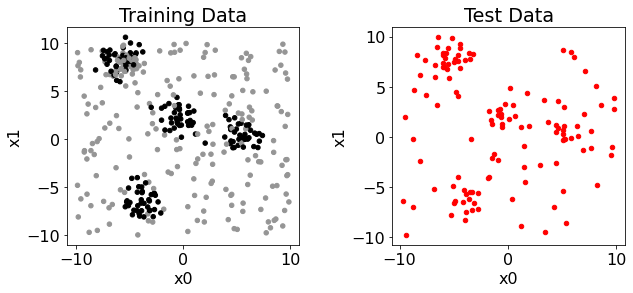

In [11]:
plt.rcParams["font.size"] = 16
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
train.plot.scatter(x="x0", y="x1", c=train["y"], vmin=-1, ax=ax[0])
test.plot.scatter(x="x0", y="x1", c="red", ax=ax[1])
ax[0].set_title("Training Data")
ax[1].set_title("Test Data")
plt.subplots_adjust(wspace=0.4)

# StandardScaler with KMeans

<AxesSubplot:xlabel='0', ylabel='1'>

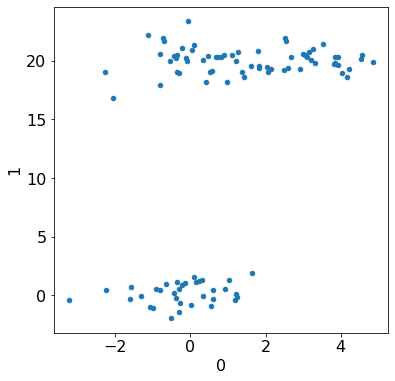

In [12]:
x = datasets.make_blobs(centers=np.array([(0,0), (0,20), (3,20)]))[0]
df = pd.DataFrame(x)
df.plot.scatter(x=0, y=1, figsize=(6,6))